# Assignment: Exploratory Data Analysis
##Nora Wiktorowicz
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 59 (delta 18), reused 36 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 4.99 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

# **Q3.** This question uses the Airbnb data to practice making visualizations.

**1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.**


In [4]:
import requests
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
airbnb = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv', low_memory = False)

***2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data. ***


In [7]:
print(airbnb.shape, '\n')
print(airbnb.head(), '\n')
airbnb.head()

(30478, 13) 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  R

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


**3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?**


In [10]:
room_type = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print(room_type)

room_type_norm = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'], normalize='all')
print(room_type_norm)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

I see a clear pattern in the type of rentals that are available. There are many more "entire home/apt" rentals available for apartments, making up 51.4% compared to other rental types. Additionally, more private room rentals are available for apartments compared to other rental types, 35.27% of rentals. However, the highest number of private room rentals are found within houses (4.13%). For house rentals, renting private rooms are more common than renting the entire property. Other property types with this pattern include treehouse, hut, other, tent, chalet, dorm, and bed & breakfast.  

**4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.**


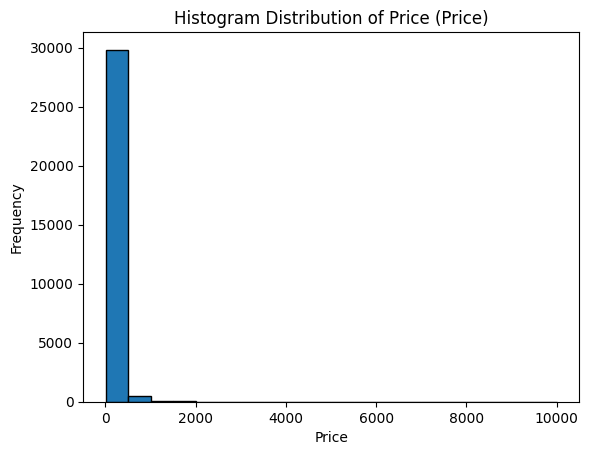

In [23]:
#make histogram
plt.hist(airbnb['Price'], bins=20, edgecolor='black')
plt.title('Histogram Distribution of Price (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

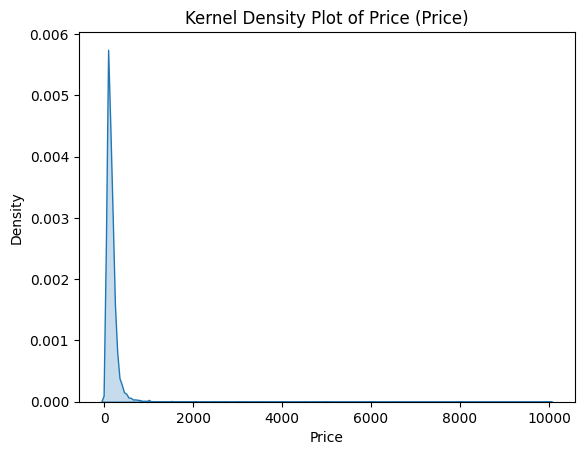

In [24]:
#make kernel density plot
sns.kdeplot (airbnb['Price'], fill=True)
plt.title('Kernel Density Plot of Price (Price)')
plt.xlabel('Price')
plt.show()

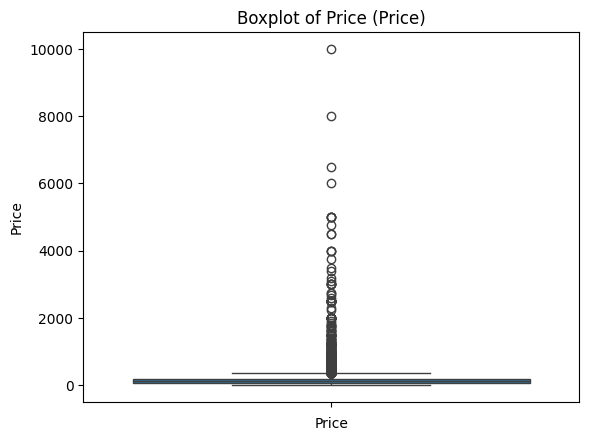

In [20]:
#make boxplot
sns.boxplot(airbnb['Price'])
plt.title('Boxplot of Price (Price)')
plt.xlabel('Price')
plt.show()

In [25]:
#make statistical description
print(airbnb['Price'].describe())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


The data is badly scaled. We can see that it is heavily skewed to the right (as shown in the kernel density plot). Additionally, the distribution of price histogram shows that the majority of listings are priced between 0-500 dollars per night. There are several outliers, as displayed on the boxplot of price. For example, there is an outlier listing with a price of nearly $10,000. Logging the price variable will help to make the scale more normalized.

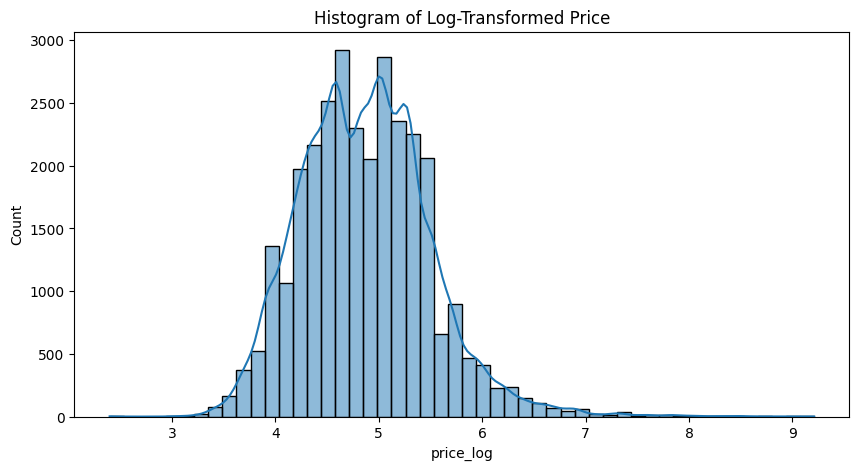

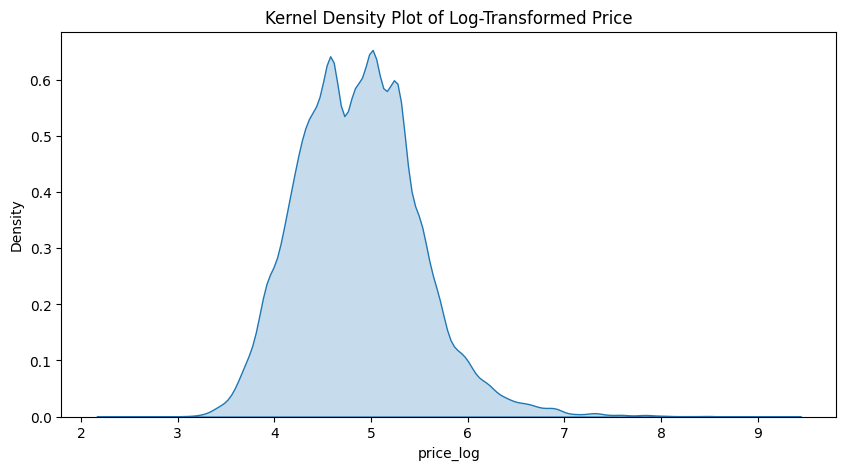

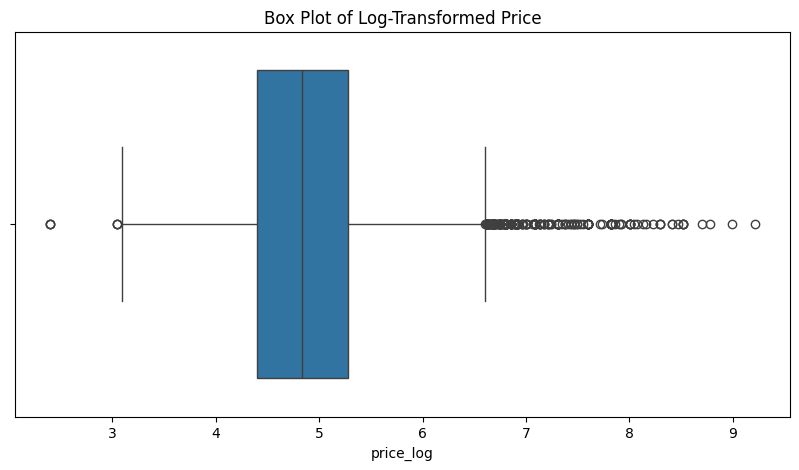

count    30478.000000
mean         4.869699
std          0.622704
min          2.397895
25%          4.394449
50%          4.836282
75%          5.278115
max          9.210440
Name: price_log, dtype: float64


In [26]:
#Make price variable logged, and try these steps again
airbnb['price_log'] = np.log1p(airbnb['Price'])

#Make histogram with price_log
plt.figure(figsize=(10,5))
sns.histplot(airbnb['price_log'], bins=50, kde=True)
plt.title("Histogram of Log-Transformed Price")
plt.show()

#Make kernel density plot with price_log
plt.figure(figsize=(10,5))
sns.kdeplot(airbnb['price_log'], fill=True)
plt.title("Kernel Density Plot of Log-Transformed Price")
plt.show()

#Make boxplot with price_log
plt.figure(figsize=(10,5))
sns.boxplot(x=airbnb['price_log'])
plt.title("Box Plot of Log-Transformed Price")
plt.show()

#Make statistical description with price_log
print(airbnb['price_log'].describe())


After creating the price_log variable, we see that the data is more normalized. For example, the kernel density plot and histogram show that the distribution is normal, and far less skewed than the original two plots.

**5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.**


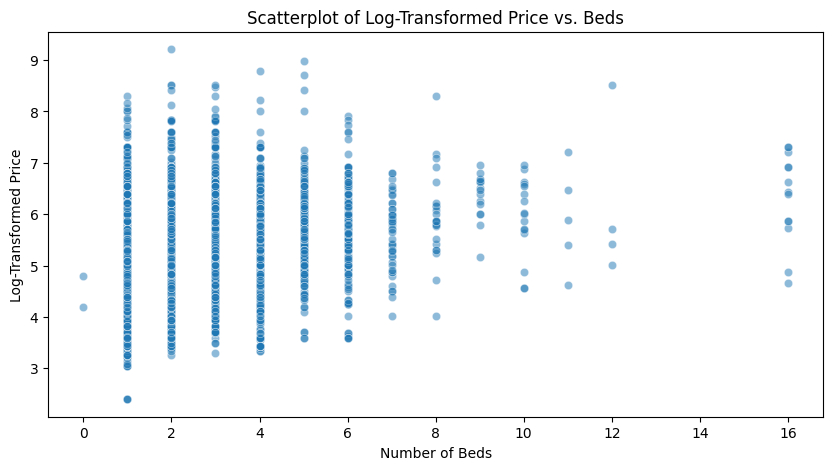

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=airbnb['Beds'], y=airbnb['price_log'], alpha=0.5)
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.title("Scatterplot of Log-Transformed Price vs. Beds")
plt.show()

From this scatterplot, I see as the number of beds increases, the distribution of prices decreases. For example, there is less variation in the log-transformed price variable when the rooms are about 10 (the price is more centralized around 5/6. However, there is a much greater spread in the log-transformed price variable when the number of beds is lower. For example, when the number of beds is 1 or 2, the spread of log-trasnformed price ranges from ~0-8.

In [28]:
bed_price_stats = airbnb.groupby('Beds')['Price'].describe()
print(bed_price_stats)

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

I see a pattern in the distribution of average price and standard deviation of prices. I see that as bed count increases, there is a general increase in the average price. Additionally, as the average price increases, in general the standard deviation for average price increases. For example, the highest average price (1418 for 12 beds), has the highest standard deviation of price (2388.29).

**6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?**

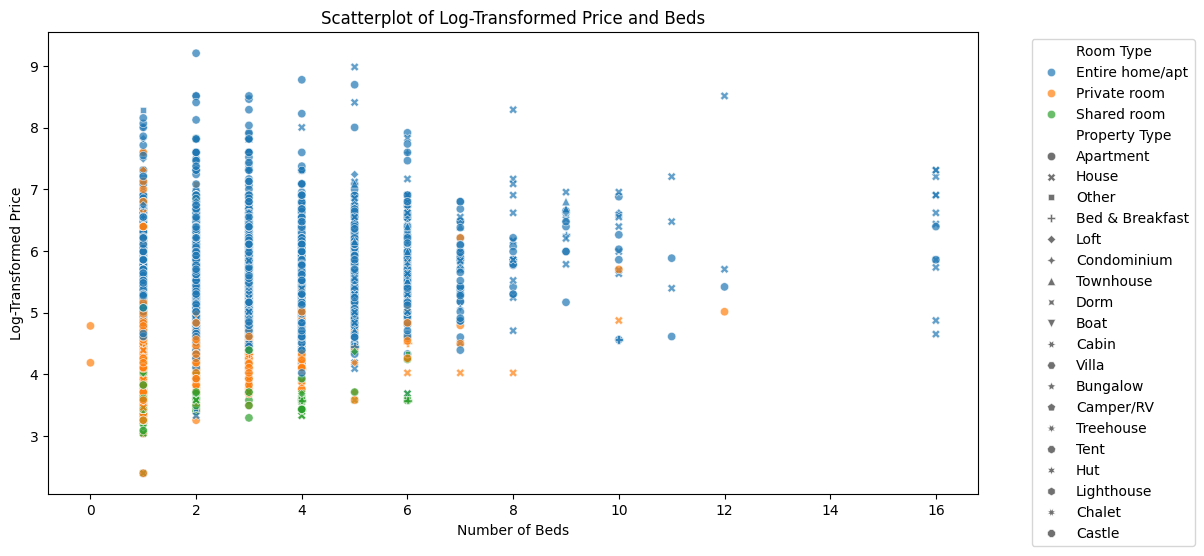

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airbnb, x='Beds', y='price_log', hue='Room Type', style='Property Type', alpha=0.7)
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.title("Scatterplot of Log-Transformed Price and Beds")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I see patterns from the scatterplot above. I see that the properties that are houses tend to have a higher number of beds, and a generally higher price. Additionally, the private room rentals tend to have lower prices than the rentals that are an entire home/apt. They also tend to have a lower number of bed count compared to rentals that are an entire home/apt.

In [31]:
room_property_price_stats = airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(room_property_price_stats)

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

After computing a description of `Price` conditional on `Room Type` and `Property Type,' I see several observations. Room type and property type "Entire home/apt and Other" have the highest price on average, with a mean of $843. This may represent luxury homes or other unique rentals. Room type and property type "Entire home/apt and Other" also have the highest standard deviation, of about 1133. Median appears to be a more reliable estimate of central tendency, as many of the standard deviations appear to be large, indicating possible outliers that may influence and sway the mean. However, utilizing median, "Entire home/apt and Other" still has the highest price of 300.


**7.We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?**

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.